In [1]:
#sometime only image classification is not yet
#to improve Accuracy we add more functionality and additional futuers
#in this we add some csv(comma seperated value) files for additional information of skin disease like age,location etc
#
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import PIL
from itertools import chain

In [2]:
model = keras.models.load_model('Skindiseasemodel.h5')

In [3]:
age_table = pd.read_csv('DiseaseAge.csv',error_bad_lines=False) 
symptoms_table = pd.read_csv('Symptoms.csv',error_bad_lines=False)
disease_location = pd.read_csv('DiseaseLocation.csv',error_bad_lines=False)

In [4]:
class_name = ['Acne', 'Actinic keratosis', 'Allergic contact dermatitis', 'Dyshidrotic Eczema', 'Eczema', 'Flat Wart', 'Impetigo', 'Lichen planus', 'Melasma', 'Psoriasis', 'Rosacea', 'Scabies', 'Seborrheic Dermatitis', 'Seborrheic Keratosis', 'Tinea', 'Urticaria', 'Vitiligo', 'Wart']

In [8]:
age = input("Enter age of Patient")
symptom = input("Enter type of symptom")
location = input("Enter the location")

Enter age of PatientAdult
Enter type of symptomItching
Enter the locationNeck


Image of the Infected area


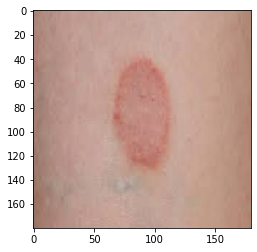

In [9]:
print("Image of the Infected area")
pridicted_image = image.load_img("G:/dataset/Sample/ringworm.jpg",target_size=(180,180))
plt.imshow(pridicted_image)
pridicted_image = image.img_to_array(pridicted_image)
pridicted_image = np.expand_dims(pridicted_image , axis=0)
result = model.predict(pridicted_image)
score = tf.nn.softmax(result[0])


In [10]:
temp_result = age_table.loc[age_table[age] == 1 & symptoms_table[symptom] , 'Disease']
temp2=age_table.loc[disease_location[location] == 1,'Disease']
temp = set(temp_result)
intersection = temp.intersection(temp2)
intersection_as_list = list(intersection)
intersection_as_list

list_first = []
for i in intersection_as_list:
    list_first.append(class_name.index(i))
second_list = np.array(score)
one_dimentional = second_list.flatten()
one_dimentional=one_dimentional * 10
final_list = []
for i in list_first:
    final_list.append(one_dimentional[i])
final_int = max(final_list)
Final_result = np.where(one_dimentional == final_int)
Final_result1 = np.array(Final_result).tolist()
flatten_list = list(chain.from_iterable(Final_result1))
for i in flatten_list:
    print(class_name[i])
    

Tinea
